In [81]:
# Import packages
import os
import glob
import rasterio

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

In [82]:
# Define filepath
filepath = 'C:/Users/Dylan Blisard/Documents/GitHub/almeda-fire-analysis/Data/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + '*.tif'))

In [83]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

In [84]:
# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

In [85]:
# Compute NBR 
np.seterr(divide='ignore', invalid='ignore')
nbr = np.divide((list_bands[2].astype(float) - list_bands[0].astype(float)), \
                (list_bands[2].astype(float) + list_bands[0].astype(float)))


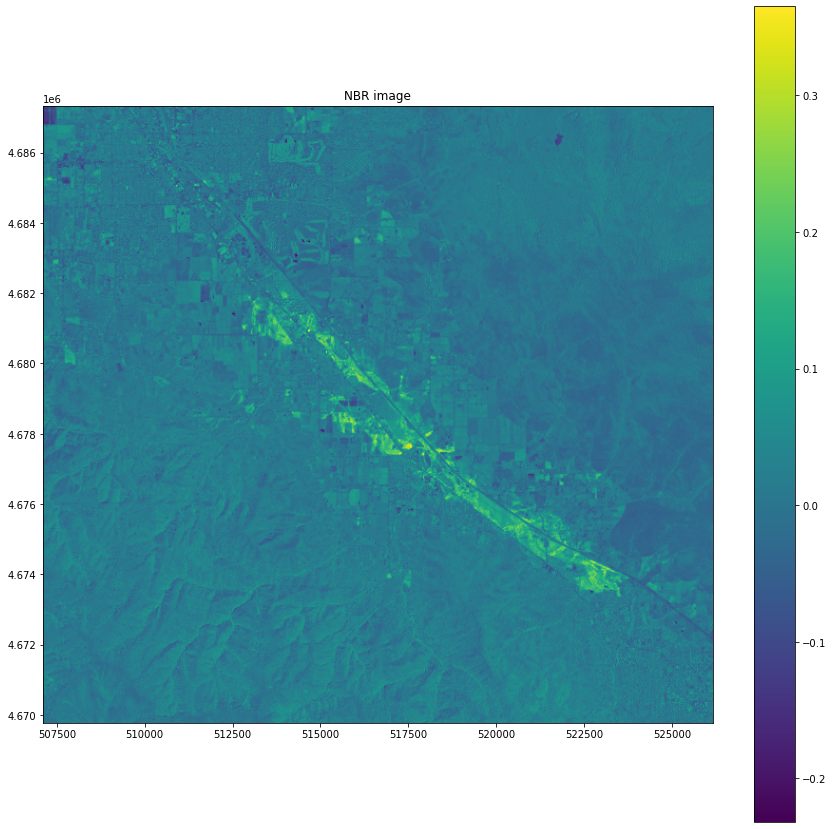

In [86]:
# Plot NBR image
fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(nbr, extent=full_extent)
ax.set_title("NBR image")
fig.colorbar(im, orientation='vertical')
plt.show()

In [87]:
# Clip NBR results
nbrClipped = nbr > 0.095

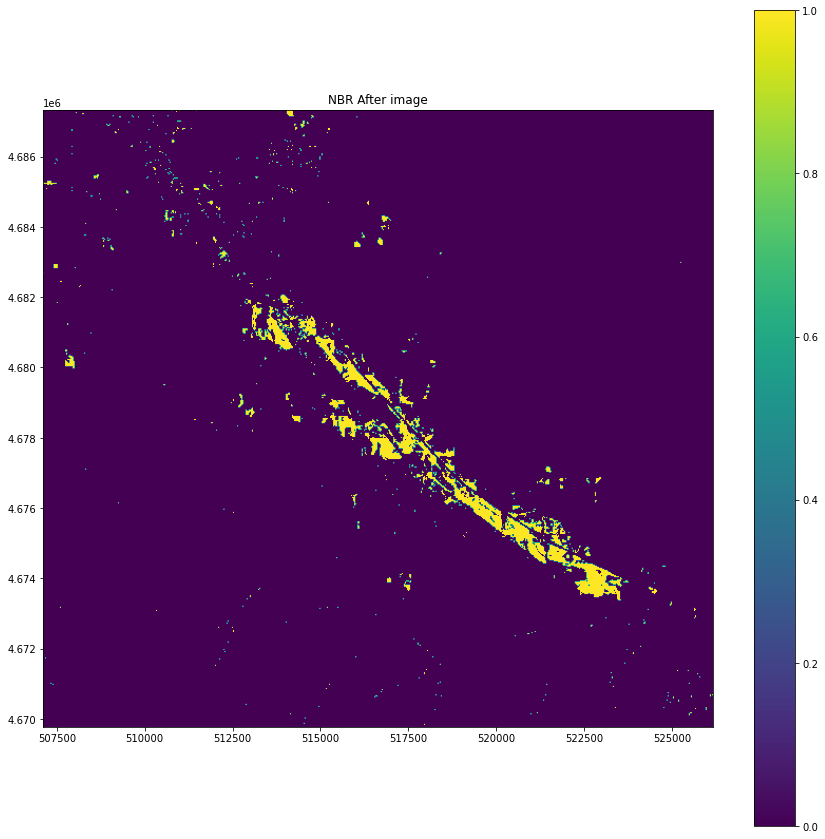

In [90]:
# Plot NBR clipped image
fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(nbrClipped, extent=full_extent)
ax.set_title("NBR After image")
fig.colorbar(im, orientation='vertical')
plt.show()

In [91]:
acres = (nbrClipped.sum()*30*30)/4046
acres

1889.4216510133465